<a href="https://colab.research.google.com/github/thoxinloi/ai/blob/main/W11_Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Normalization
from keras.layers import LeakyReLU 
from keras.optimizers import Adam
batch_size=64
epochs=20
classes=10

In [ ]:
from keras.backend import categorical_crossentropy
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
train=model.fit(x_train,y_train,batch_size,epochs=epochs,verbose=1)

Epoch 1/20
938/938 [==============================] - 13s 4ms/step - loss: 0.4119 - accuracy: 0.8524
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2678 - accuracy: 0.9027
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2247 - accuracy: 0.9172
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1942 - accuracy: 0.9281
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1681 - accuracy: 0.9382
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1472 - accuracy: 0.9461
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1244 - accuracy: 0.9536
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1057 - accuracy: 0.9606
Epoch 9/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0893 - accuracy: 0.9671
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0766 - accuracy: 0.971

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/fashion_mnist.h5')

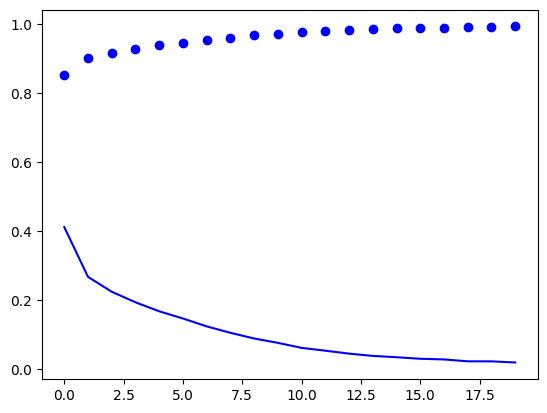

In [ ]:
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()